In [2]:
# import libraries
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [3]:
# "manually" in numpy

# the list of numbers
z = [1,2,3]

# compute the softmax result
num = np.exp(z)
den = np.sum( np.exp(z) )
sigma = num / den

print(sigma)
print(np.sum(sigma))

[0.09003057 0.24472847 0.66524096]
1.0


[ 5 -4 12 12 10  6  3 12 14 -5 13  8  1  5  4  4 -4  9 10  0 12  3 14  2
 11]


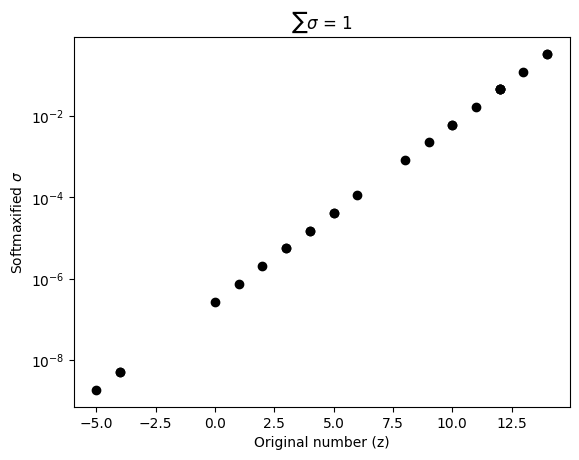

In [4]:
# repeat with some random integers
z = np.random.randint(-5,high=15,size=25)
print(z)

# compute the softmax result
num = np.exp(z)
den = np.sum( num )
sigma = num / den

# compare
plt.plot(z,sigma,'ko')
plt.xlabel('Original number (z)')
plt.ylabel('Softmaxified $\sigma$')
plt.yscale('log')
plt.title('$\sum\sigma$ = %g' %np.sum(sigma))
plt.show()

In [5]:
# slightly more involved using torch.nn

# create an instance of the softmax activation class
softfun = nn.Softmax(dim=0)

# then apply the data to that function
sigmaT = softfun( torch.Tensor(z) )

# now we get the results
print(sigmaT)

tensor([4.1060e-05, 5.0672e-09, 4.5028e-02, 4.5028e-02, 6.0939e-03, 1.1161e-04,
        5.5569e-06, 4.5028e-02, 3.3272e-01, 1.8641e-09, 1.2240e-01, 8.2472e-04,
        7.5205e-07, 4.1060e-05, 1.5105e-05, 1.5105e-05, 5.0672e-09, 2.2418e-03,
        6.0939e-03, 2.7666e-07, 4.5028e-02, 5.5569e-06, 3.3272e-01, 2.0443e-06,
        1.6565e-02])


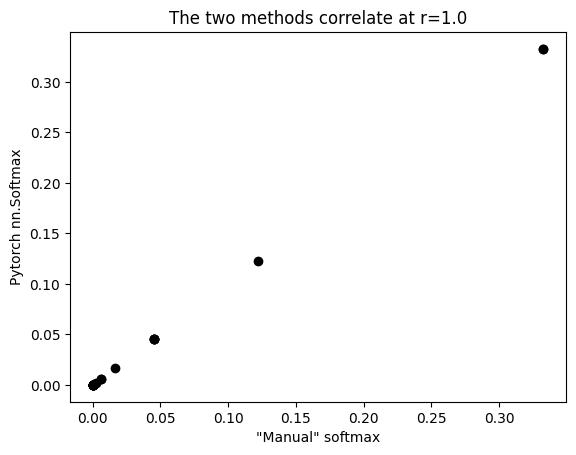

In [6]:
# show that they are the same
plt.plot(sigma,sigmaT,'ko')
plt.xlabel('"Manual" softmax')
plt.ylabel('Pytorch nn.Softmax')
plt.title(f'The two methods correlate at r={np.corrcoef(sigma,sigmaT)[0,1]}')
plt.show()